In [1]:
import radd
from radd import build
from radd.tools import vis
%matplotlib inline

In [2]:
# read in example dataframe 
data = radd.load_example_data()
# baseline (bsl) and caution (pnl) conditions in 'Cond' column
data.head()

,idx,Cond,ttype,choice,response,acc,rt,ssd
0,28,bsl,go,go,1,1,0.59853,1000
1,28,bsl,go,go,1,1,0.52017,1000
2,28,bsl,go,go,1,1,0.54513,1000
3,28,bsl,go,go,1,1,0.57159,1000
4,28,bsl,go,go,1,1,0.50522,1000


In [3]:
# initiate dependent process model with dynamic gain (kind = 'xdpm')
# (change kind='dpm' for model with no dynamic gain signal)
# drift-rate (v) depends on Baseline and Caution levels of 'Cond' variable
dpm = build.Model(kind='xdpm', data=data, depends_on={'v':'Cond'}, fit_on='average')

## Animation of Dependent Process Model

In [9]:
from radd.tools.vis import render_animation, animate_dpm
# Initial state of Stop process (red) depends on current strength of Go activation (green).
# Assumes Stop signal efficacy at later SSDs diminishes as state of Go activation 
# approaches the (upper) execution threshold. (SSD in pink, trial deadline in blue)
render_animation(animate_dpm(dpm))

### columns in model's observed dataframe (model.observedDF)
* **idx**: subject ID
* **Cond**: Baseline(bsl)/Caution(pnl) (could be any experimental condition of interest) 
* **Acc**: Accuracy on "go" trials
* **200 - 400**: SSD conditions (in ms)
* **c10 - c90**: 10th - 90th RT quantiles for correct responses
* **e10 - e90**: 10th - 90th RT quantiles for error responses

In [66]:
dpm.observedDF.head()

,idx,Cond,acc,200,250,300,350,400,c10,c30,c50,c70,c90,e10,e30,e50,e70,e90
0,28,bsl,0.99174,1.0,1.0,0.95,0.60,0.00,0.50509,0.53191,0.55812,0.56643,0.59818,0.49608,0.53166,0.53187,0.54585,0.56744
1,28,pnl,0.97521,1.0,1.0,0.95,0.80,0.10,0.51767,0.54517,0.57184,0.59735,0.61186,0.51983,0.54525,0.55858,0.57181,0.60212
2,29,bsl,0.99174,1.0,1.0,1.00,0.90,0.00,0.52504,0.54513,0.55850,0.57196,0.59844,0.52676,0.54510,0.55845,0.57092,0.59019
3,29,pnl,0.96694,1.0,1.0,1.00,0.75,0.35,0.53145,0.55997,0.58502,0.59849,0.62498,0.53144,0.54477,0.55171,0.57507,0.59804
4,30,bsl,0.94215,1.0,1.0,1.00,0.80,0.25,0.52978,0.57188,0.59812,0.61175,0.63843,0.53607,0.56057,0.58535,0.60980,0.62076


## Optimize DPM to the average data (across subjects; drift-rate free between Baseline/Caution) 

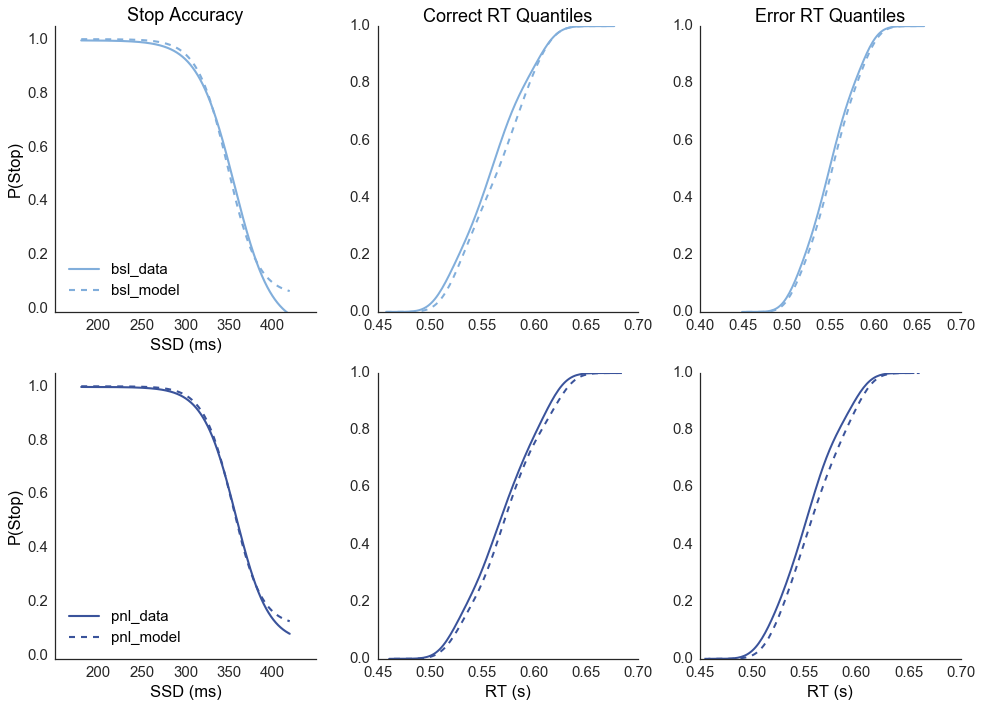

In [133]:
# fit DPM using combination of global (basinhopping + TNC)
# and local gradient optimization (Nelder-Mead Simplex)
dpm.set_basinparams(disp=False)
dpm.optimize(plot_fits=True)

## Examine fits
* txt summary of the fit results are saved to the working dir 

In [138]:
# the fit summary (goodness of fit measures, etc.) 
# is also available in .finfo attr
dpm.finfo

v_bsl      0.90917
v_pnl      0.87237
a          0.55563
xb         1.81323
ssv       -1.10396
tr         0.11691
cnvrg      1.00000
nfev      61.00000
nvary      2.00000
chi        0.00560
ndata     32.00000
df        30.00000
rchi       0.00019
logp    -274.73923
AIC     -270.73923
BIC     -270.58034
idx       28.00000
dtype: float64

In [139]:
# best-fit parameter estimates also stored in popt dictionary
dpm.popt

{'a': 0.55563098,
 'ssv': -1.1039584,
 'tr': 0.11691031,
 'v': array([ 0.90917,  0.87237]),
 'v_bsl': 0.90917056155872977,
 'v_pnl': 0.87236760362979426,
 'xb': 1.813231}